In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

## Choose two stocks 

In [2]:
l1=['PFE','LULU']

In [3]:
# daily stock prices 
df1 = pdr.get_data_yahoo(l1, start='2016-01-01',end='2021-11-01')['Adj Close']
df1

Symbols,PFE,LULU
Date,,
2016-01-04,24.188957,55.860001
2016-01-05,24.363089,55.590000
2016-01-06,23.931553,54.910000
2016-01-07,23.772558,54.790001
2016-01-08,23.469727,53.910000
...,...,...
2021-10-26,43.180965,432.730011
2021-10-27,42.596100,433.700012
2021-10-28,42.804272,443.459991


In [4]:
# log return
df2=np.log(df1/df1.shift(1))
df2

Symbols,PFE,LULU
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.007173,-0.004845
2016-01-06,-0.017871,-0.012308
2016-01-07,-0.006666,-0.002188
2016-01-08,-0.012821,-0.016192
...,...,...
2021-10-26,0.009457,0.011131
2021-10-27,-0.013637,0.002239
2021-10-28,0.004875,0.022255


In [5]:
# correlation matrix 
df2.corr()

Symbols,PFE,LULU
Symbols,,
PFE,1.000000,0.215113
LULU,0.215113,1.000000


In [6]:
# correlation with AAPL
df2.corr()['PFE']

Symbols
PFE     1.000000
LULU    0.215113
Name: PFE, dtype: float64

## Return and risk of a two-stock portfolio 

In [7]:
df3=df2[['PFE','LULU']]
df3

Symbols,PFE,LULU
Date,,
2016-01-04,NaN,NaN
2016-01-05,0.007173,-0.004845
2016-01-06,-0.017871,-0.012308
2016-01-07,-0.006666,-0.002188
2016-01-08,-0.012821,-0.016192
...,...,...
2021-10-26,0.009457,0.011131
2021-10-27,-0.013637,0.002239
2021-10-28,0.004875,0.022255


In [8]:
# weights of individual stocks 
a1 = np.array([0.5,0.5])

### Portfolio return

In [9]:
# individual stocks' daily returns 
df3.mean()

Symbols
PFE     0.000396
LULU    0.001435
dtype: float64

In [10]:
# portfolio return
np.dot(df3.mean(),a1)

0.0009152856281133842

In [11]:
# annualize the portfolio return 
np.dot(df3.mean(),a1)*250

0.22882140702834605

### Portfolio variance 

In [12]:
# covariance matrix
df3.cov()

Symbols,PFE,LULU
Symbols,,
PFE,0.000191,0.000071
LULU,0.000071,0.000577


In [13]:
# annualize the covariance matrix 
df3.cov()*250

Symbols,PFE,LULU
Symbols,,
PFE,0.047705,0.017850
LULU,0.017850,0.144342


In [14]:
# portfolio variance 
np.dot(a1.T, np.dot(df3.cov(), a1))

0.00022774727119032436

In [15]:
# annualize the portfolio variance 
np.dot(a1.T, np.dot(df3.cov()*250, a1))

0.056936817797581085

### Portfolio standard deviation

In [16]:
# portfolio standard deviation 
np.dot(a1.T, np.dot(df3.cov(), a1))**0.5

0.015091297863017758

In [17]:
np.sqrt(np.dot(a1.T, np.dot(df3.cov(), a1)))

0.015091297863017758

In [18]:
# annualize the portfolio standard deviation 
np.dot(a1.T, np.dot(df3.cov()*250, a1))**0.5

0.23861437047583928

In [19]:
np.sqrt(np.dot(a1.T, np.dot(df3.cov()*250, a1)))

0.23861437047583928

### Portfolio return and risk function: input is an array

In [20]:
def return_risk_array(a1):
    df=pd.DataFrame(data={'return':np.zeros(1),'std':np.zeros(1)})
    df['return']=np.dot(df3.mean(),a1)*250
    df['std']=np.dot(a1.T, np.dot(df3.cov()*250, a1))**0.5
    return df
#a1 represent array（改成a也可以）

In [21]:
pd.DataFrame(data={'return':np.zeros(1),'std':np.zeros(1)})

,return,std
0,0.0,0.0


In [22]:
return_risk_array(a1)

,return,std
0,0.228821,0.238614


In [23]:
return_risk_array(np.array([0.3,0.7]))

,return,std
0,0.280749,0.287259


In [24]:
return_risk_array(np.array([1,0]))

,return,std
0,0.099002,0.218415


In [27]:
df3['PFE'].mean()*250

0.09900177571056847

In [28]:
df3['PFE'].std()*250**0.5

0.21841478701618844

## Feasible set of a two-stock portfolio: uniformly distributed random numbers

In [29]:
np.random.seed(0)
# 10*2 random numbers from a uniform distribution over [0, 1)
a2=np.random.rand(10,2)
a2

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

In [30]:
np.random.rand(10,2)
#result will keep changing(10 column 2 row)

array([[0.97861834, 0.79915856],
       [0.46147936, 0.78052918],
       [0.11827443, 0.63992102],
       [0.14335329, 0.94466892],
       [0.52184832, 0.41466194],
       [0.26455561, 0.77423369],
       [0.45615033, 0.56843395],
       [0.0187898 , 0.6176355 ],
       [0.61209572, 0.616934  ],
       [0.94374808, 0.6818203 ]])

In [31]:
a2[1]

array([0.60276338, 0.54488318])

In [32]:
sum(a2[1])

1.1476465590685407

In [33]:
a2[1]/sum(a2[1])

array([0.52521691, 0.47478309])

In [34]:
a2[1]

array([0.60276338, 0.54488318])

In [35]:
sum(a2[1])

1.1476465590685407

In [36]:
for i in range(len(a2)):
    print(i)
#位置0-9

0
1
2
3
4
5
6
7
8
9


In [37]:
for i in range(len(a2)):
    a2[i]=a2[i]/sum(a2[i])
print(a2)

[[0.43418691 0.56581309]
 [0.52521691 0.47478309]
 [0.39610605 0.60389395]
 [0.32917129 0.67082871]
 [0.7153587  0.2846413 ]
 [0.59951013 0.40048987]
 [0.38030858 0.61969142]
 [0.44912526 0.55087474]
 [0.02370719 0.97629281]
 [0.47213411 0.52786589]]


In [38]:
np.random.seed(0)
a2=np.random.rand(10,2)
a2

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318],
       [0.4236548 , 0.64589411],
       [0.43758721, 0.891773  ],
       [0.96366276, 0.38344152],
       [0.79172504, 0.52889492],
       [0.56804456, 0.92559664],
       [0.07103606, 0.0871293 ],
       [0.0202184 , 0.83261985],
       [0.77815675, 0.87001215]])

In [39]:
for i in range(len(a2)):
    a2[i]/=sum(a2[i])
print(a2)

[[0.43418691 0.56581309]
 [0.52521691 0.47478309]
 [0.39610605 0.60389395]
 [0.32917129 0.67082871]
 [0.7153587  0.2846413 ]
 [0.59951013 0.40048987]
 [0.38030858 0.61969142]
 [0.44912526 0.55087474]
 [0.02370719 0.97629281]
 [0.47213411 0.52786589]]


In [40]:
a2[1]

array([0.52521691, 0.47478309])

In [41]:
np.dot(df3.mean(),a2[1])*250

0.22227410789152466

In [42]:
np.dot(a2[1].T, np.dot(df3.cov()*250, a2[1]))**0.5

0.23366505403837637

In [43]:
len(a2)

10

### Feasible set fucntion: input is an array

In [44]:
def feasible_array(a2):
    df=pd.DataFrame(data={'return':np.zeros(len(a2)),'std':np.zeros(len(a2))})
    for i in range(len(a2)):
        df['return'][i]=np.dot(df3.mean(),a2[i])*250
        df['std'][i]=np.dot(a2[i].T, np.dot(df3.cov()*250, a2[i]))**0.5
    return df
#mutiple pairs用a2[i],前面例子只有一個就用a1即可
#把a2改成a結果不會變（a:weight)

In [45]:
pd.DataFrame(data={'return':np.zeros(len(a2)),'std':np.zeros(len(a2))})

,return,std
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


In [46]:
a2

array([[0.43418691, 0.56581309],
       [0.52521691, 0.47478309],
       [0.39610605, 0.60389395],
       [0.32917129, 0.67082871],
       [0.7153587 , 0.2846413 ],
       [0.59951013, 0.40048987],
       [0.38030858, 0.61969142],
       [0.44912526, 0.55087474],
       [0.02370719, 0.97629281],
       [0.47213411, 0.52786589]])

In [47]:
feasible_array(a2)

,return,std
0,0.245909,0.252931
1,0.222274,0.233665
2,0.255796,0.262039
3,0.273175,0.279299
4,0.172906,0.208270
5,0.202985,0.221063
6,0.259898,0.265976
7,0.242030,0.249515
8,0.352486,0.372065
9,0.236056,0.244440


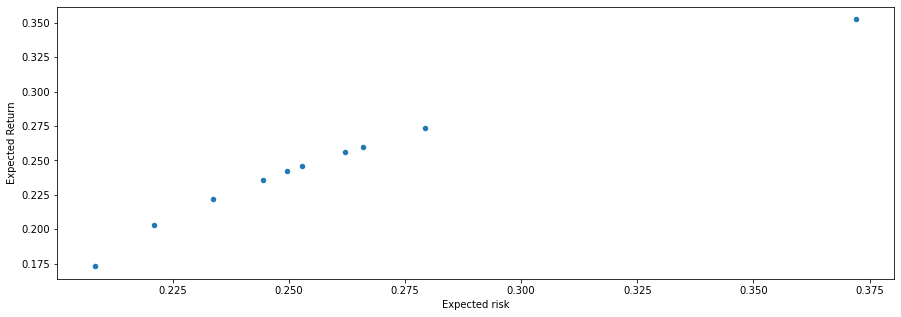

In [48]:
feasible_array(a2).plot(x='std',y='return',kind='scatter',figsize=(15,5))
plt.xlabel('Expected risk')
plt.ylabel('Expected Return')
plt.show()
#plt.show() or ; can remove the text

### Feasible set fucntion: input is a number

In [49]:
def feasible_n(n):
    np.random.seed(0)
    a2=np.random.rand(n,2)
    df=pd.DataFrame(data={'return':np.zeros(n),'std':np.zeros(n)})
    for i in range(n):
        a2[i]/=sum(a2[i])
        df['return'][i]=np.dot(df3.mean(),a2[i])*250
        df['std'][i]=np.dot(a2[i].T, np.dot(df3.cov()*250, a2[i]))**0.5
    return df
#n: integer(how many portfolios you want)

In [50]:
feasible_n(10)

,return,std
0,0.245909,0.252931
1,0.222274,0.233665
2,0.255796,0.262039
3,0.273175,0.279299
4,0.172906,0.208270
5,0.202985,0.221063
6,0.259898,0.265976
7,0.242030,0.249515
8,0.352486,0.372065
9,0.236056,0.244440


In [51]:
feasible_n(300)

,return,std
0,0.245909,0.252931
1,0.222274,0.233665
2,0.255796,0.262039
3,0.273175,0.279299
4,0.172906,0.208270
...,...,...
295,0.241358,0.248933
296,0.213301,0.227418
297,0.297949,0.306184
298,0.245728,0.252769


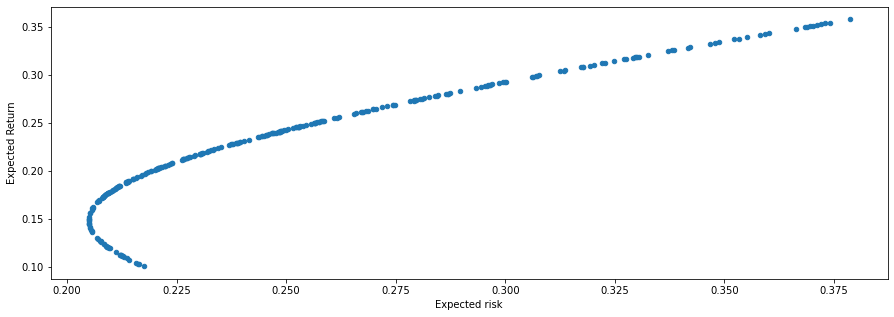

In [52]:
feasible_n(300).plot(x='std',y='return',kind='scatter',figsize=(15,5))
plt.xlabel('Expected risk')
plt.ylabel('Expected Return')
plt.show()
#scatter點點

## Minimum variance portfolio

### 10 pairs of weights

In [53]:
df4=feasible_n(10)
df4

,return,std
0,0.245909,0.252931
1,0.222274,0.233665
2,0.255796,0.262039
3,0.273175,0.279299
4,0.172906,0.208270
5,0.202985,0.221063
6,0.259898,0.265976
7,0.242030,0.249515
8,0.352486,0.372065
9,0.236056,0.244440


In [54]:
# the minimum std 
df4['std'].min() 

0.2082702502579152

In [55]:
# the index of the minimum std 
df4['std'].idxmin() 

4

In [56]:
# the minimum variance portfolio 
df4.iloc[3]

return    0.273175
std       0.279299
Name: 3, dtype: float64

In [57]:
df4.iloc[df4['std'].idxmin()]
#idxmin return the row number 3

return    0.172906
std       0.208270
Name: 4, dtype: float64

In [58]:
# return of the minimum variance portfolio 
min_return=df4['return'].iloc[3]
min_return

0.27317524823026307

In [59]:
df4['return'].iloc[df4['std'].idxmin()]

0.17290583402261986

## Efficient frontier 

In [60]:
# return the complete rows where the value of column ret> the minimum variance portfolio's return 
df4[df4['return']>min_return]

,return,std
8,0.352486,0.372065


In [61]:
df4[df4['return']>df4['return'].iloc[df4['std'].idxmin()]]

,return,std
0,0.245909,0.252931
1,0.222274,0.233665
2,0.255796,0.262039
3,0.273175,0.279299
5,0.202985,0.221063
6,0.259898,0.265976
7,0.242030,0.249515
8,0.352486,0.372065
9,0.236056,0.244440


### 300 pairs of weights

In [62]:
df5=feasible_n(300)

In [63]:
# portfolios above the minimum variance portfolio 
df6=df5[df5['return']>df5['return'].iloc[df5['std'].idxmin()]]
df6

,return,std
0,0.245909,0.252931
1,0.222274,0.233665
2,0.255796,0.262039
3,0.273175,0.279299
4,0.172906,0.208270
...,...,...
295,0.241358,0.248933
296,0.213301,0.227418
297,0.297949,0.306184
298,0.245728,0.252769


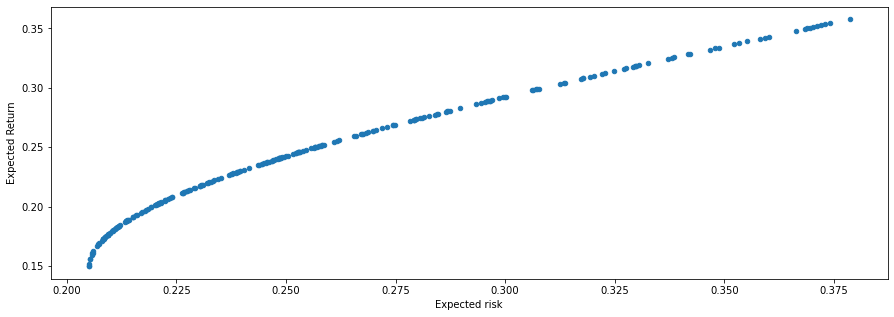

In [64]:
df6.plot(x='std',y='return',kind='scatter',figsize=(15,5))
plt.xlabel('Expected risk')
plt.ylabel('Expected Return')
plt.show()
#get efficient frontier

### Plot the feasible set and efficient frontier 

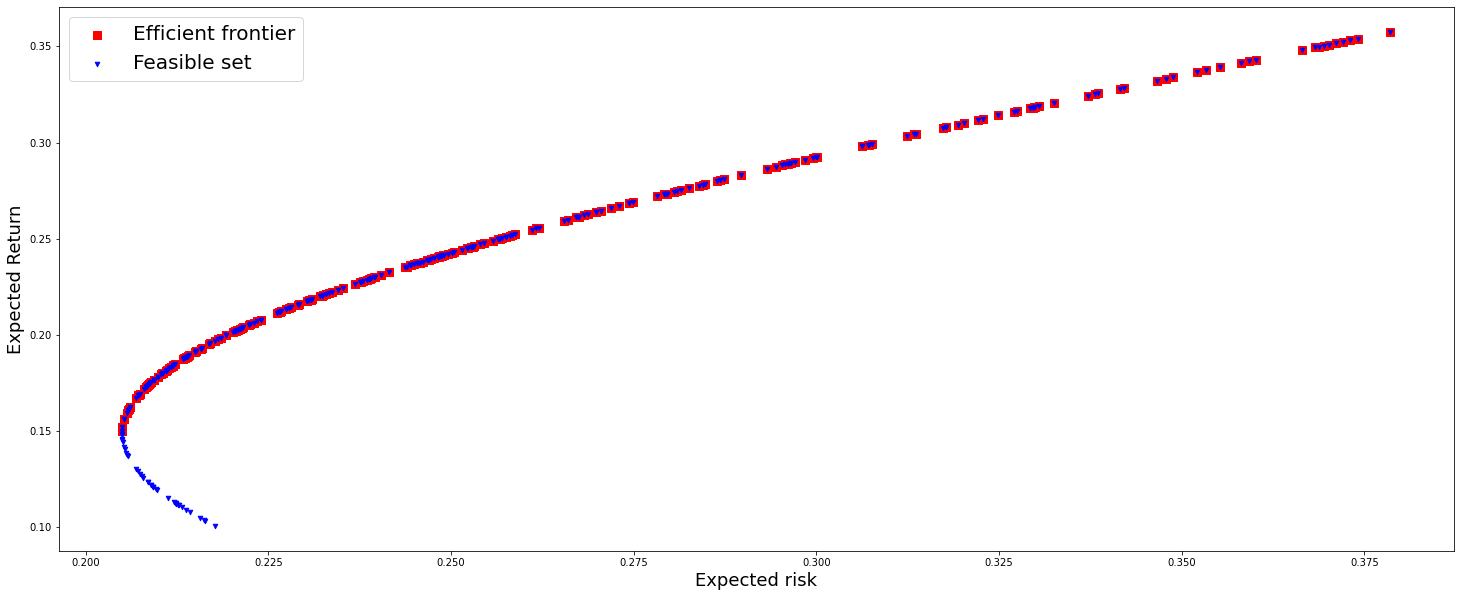

In [65]:
# gca stands for 'get current axis':plot df5 and df6
ax = plt.gca()
df6.plot(x='std',y='return',kind='scatter',color='red',s=50,marker="s",ax=ax,figsize=(25,10),label="Efficient frontier")
df5.plot(x='std',y='return',kind='scatter',color='blue',s=20,marker="v",ax=ax,figsize=(25,10),label="Feasible set")
plt.legend(prop={'size': 20})  #size of dots=20
plt.xlabel('Expected risk',fontsize=18)
plt.ylabel('Expected Return',fontsize=18)
plt.show()
# s: size 
# marker: triangle(v), square(s) 
# prop: the properties of the legend
#df5:all portfolios, df6:efficient frontier portfolios